## Combine all Musems & Normalizing

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json

In [5]:
df_british = pd.read_csv('British_result.csv') 
df_global = pd.read_csv('combined_Global.csv')
df_met = pd.read_csv('combined_Met.csv')
df_rosi = pd.read_csv('combined_Rosi.csv')

## Which columns to leave ?

`The common are & to normalize ✨🌿`
1. Object_classification
2. material
3. path
4. date
5. location 
6. description
7. period
8. dynasty
9. Name

In [6]:
def adjust_image_path(cellvalue, cat_museum):
    file_name = cellvalue.split('\\')[-1]
    file_name = file_name.split('.')[-2]
    new_name = f"{cat_museum}_{file_name}.jpg"
    return new_name 

### British Museum 

In [7]:
df_british.columns

Index(['Unnamed: 0', 'artifact_name', 'Object Type', 'Production date',
       'Production place', 'Technique', 'Condition', 'Description_ex',
       'Materials_ex', 'Findspot_ex', 'Dimensions_1', 'Dimensions_2',
       'Department_ex', 'Cultures/periods_ex', 'image_path'],
      dtype='object')

In [8]:
df_british

,Unnamed: 0,artifact_name,Object Type,Production date,Production place,Technique,Condition,Description_ex,Materials_ex,Findspot_ex,Dimensions_1,Dimensions_2,Department_ex,Cultures/periods_ex,image_path
0,0,ear-ring; bead,"[' ear-ring ', ' bead ']",1stC-3rdC (?),Made in: Afghanistan,"[' cast ', ' pierced ', ' twisted (wire) ']",NaN,Copper alloy ear-ring of thin wire with a loo...,copper alloy,Found/Acquired: Begram,Diameter: 5 millimetres (beads),Length: 18 millimetres (circa),Asia,NaN,bri_A_1880-3687-m.jpg
1,1,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Made in: Afghanistan,['cast'],NaN,Copper alloy ornamental hair- or dress-pin he...,copper alloy,Found/Acquired: Begram,Length: 35 millimetres,Width: 10 millimetres,Asia,NaN,bri_A_1880-3711-o.jpg
2,2,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Made in: Afghanistan,['cast'],NaN,Copper alloy ornamental hair- or dress-pin he...,copper alloy,Found/Acquired: Begram,Length: 35 millimetres,Width: 10 millimetres,Asia,NaN,bri_A_1880-3714-a.jpg
3,3,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Made in: Afghanistan,['cast'],NaN,Copper alloy ornamental hair- or dress-pin he...,copper alloy,Found/Acquired: Begram,Length: 35 millimetres,Width: 10 millimetres,Asia,NaN,bri_A_1880-3717-f.jpg
4,4,ear-ring,['ear-ring'],1stC-3rdC (circa),Made in: Afghanistan,['cast'],NaN,"Cast, copper alloy hoop ear-ring bound with t...",copper alloy,Found/Acquired: Begram,Diameter: 12 millimetres,Thickness: 1.50 millimetres (shaft),Asia,NaN,bri_A_1880-3960.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56830,56830,papyrus,['papyrus'],NaN,NaN,NaN,['Papyrus Survey: Condition Details: Papyrus: ...,Papyrus Harris; column 75; Discourse to Manki...,papyrus,Excavated/Findspot: Thebes (historic - Upper ...,Height: 45.80 centimetres (frame),Length: 58.90 centimetres (frame),Egypt and Sudan,20th Dynasty,bri_Y_EA9999-62.jpg
56831,56831,papyrus,['papyrus'],NaN,NaN,NaN,['Papyrus Survey: Condition Details: Papyrus: ...,Papyrus Harris; column 76; Discourse to Manki...,papyrus,Excavated/Findspot: Thebes (historic - Upper ...,Height: 45.80 centimetres (frame),Length: 58.70 centimetres (frame),Egypt and Sudan,20th Dynasty,bri_Y_EA9999-75.jpg
56832,56832,papyrus,['papyrus'],NaN,NaN,NaN,['Papyrus Survey: Condition Details: Papyrus: ...,Papyrus Harris; column 77; Discourse to Manki...,papyrus,Excavated/Findspot: Thebes (historic - Upper ...,Height: 45.80 centimetres (frame),Length: 58.70 centimetres (frame),Egypt and Sudan,20th Dynasty,bri_Y_EA9999-76.jpg
56833,56833,papyrus,['papyrus'],NaN,NaN,NaN,['Papyrus Survey: Condition Details: Papyrus: ...,Papyrus Harris; column 78; Discourse to Manki...,papyrus,Excavated/Findspot: Thebes (historic - Upper ...,Height: 45.80 centimetres (frame),Length: 58.70 centimetres (frame),Egypt and Sudan,20th Dynasty,bri_Y_EA9999-77.jpg


In [9]:
len(df_british)  # one is missing

56835

In [10]:
df_british["Department_ex"].unique()

array(['Asia', 'Coins and Medals', 'Africa, Oceania and the Americas',
       'Greek and Roman', 'Britain, Europe and Prehistory',
       'Prints and Drawings', 'Middle East', 'External',
       'Egypt and Sudan'], dtype=object)

In [11]:
#df_british= df_british[df_british["Department_ex"] == 'Egypt and Sudan'] # filtered to only have egypt pieces 

In [12]:
df_british = df_british.drop(columns=["Unnamed: 0","Findspot_ex", "Dimensions_1", "Dimensions_2", "Department_ex","Condition", "Production place", "Technique",  ])

In [13]:
df_british = df_british.rename(columns={"Production date":"date",'Object Type': 'object_classification', 'Materials_ex':'material', 'image_path':'path', 'Cultures/periods_ex': 'dynasty', 'Description_ex':'description', "artifact_name":"name"})

In [14]:
# df_british['date'] = None
df_british['location'] = None # the location in this data is just the place "Egypt"
df_british['period'] = None


In [15]:

other_cols= list(df_british.columns.difference(["path"]))

In [16]:
df_british

,name,object_classification,date,description,material,dynasty,path,location,period
0,ear-ring; bead,"[' ear-ring ', ' bead ']",1stC-3rdC (?),Copper alloy ear-ring of thin wire with a loo...,copper alloy,NaN,bri_A_1880-3687-m.jpg,None,None
1,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3711-o.jpg,None,None
2,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3714-a.jpg,None,None
3,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3717-f.jpg,None,None
4,ear-ring,['ear-ring'],1stC-3rdC (circa),"Cast, copper alloy hoop ear-ring bound with t...",copper alloy,NaN,bri_A_1880-3960.jpg,None,None
...,...,...,...,...,...,...,...,...,...
56830,papyrus,['papyrus'],NaN,Papyrus Harris; column 75; Discourse to Manki...,papyrus,20th Dynasty,bri_Y_EA9999-62.jpg,None,None
56831,papyrus,['papyrus'],NaN,Papyrus Harris; column 76; Discourse to Manki...,papyrus,20th Dynasty,bri_Y_EA9999-75.jpg,None,None
56832,papyrus,['papyrus'],NaN,Papyrus Harris; column 77; Discourse to Manki...,papyrus,20th Dynasty,bri_Y_EA9999-76.jpg,None,None
56833,papyrus,['papyrus'],NaN,Papyrus Harris; column 78; Discourse to Manki...,papyrus,20th Dynasty,bri_Y_EA9999-77.jpg,None,None


### Global Museum

In [17]:
df_global.columns

Index(['Unnamed: 0', 'Archaeological Site', 'Category', 'Material', 'Dating',
       'Description', 'Path', 'Name'],
      dtype='object')

In [18]:
df_global = df_global.drop(columns=['Unnamed: 0'])

In [19]:
df_global ['Path'] = df_global ['Path'].apply(lambda cellvalue: adjust_image_path(cellvalue, "glo"))
df_global .head(5)

,Archaeological Site,Category,Material,Dating,Description,Path,Name
0,el-faiyum,relief,limestone,roman period,several late period texts mention a lion god n...,glo_1.jpg,tithoes
1,unknown,coptic textile,wool,byzantine period,"this piece of fabric is a so-called ""taquetã©'...",glo_10.jpg,fragment of wedge shape
2,governorate of faiyum,basket,rush,graeco-roman period,this basket comes from the excavations of b. g...,glo_100.jpg,basket with lid
3,abydos,palette,greywacke,early dynastic period,this fragment of a rectangular palette diagram...,glo_1000.jpg,fragment of rectangular palette
4,thebes: west bank,finger ring,bronze,unknown,NaN,glo_10000.jpg,NaN


In [20]:
df_global = df_global.rename(columns={'Archaeological Site':'location', 'Category': 'object_classification','Material': 'material', 'Dating': 'period','Description':'description', "Name":'name',"Path":'path'})

In [21]:
df_global["date"] = None
df_global["dynasty"] = None


In [22]:
df_global

,location,object_classification,material,period,description,path,name,date,dynasty
0,el-faiyum,relief,limestone,roman period,several late period texts mention a lion god n...,glo_1.jpg,tithoes,None,None
1,unknown,coptic textile,wool,byzantine period,"this piece of fabric is a so-called ""taquetã©'...",glo_10.jpg,fragment of wedge shape,None,None
2,governorate of faiyum,basket,rush,graeco-roman period,this basket comes from the excavations of b. g...,glo_100.jpg,basket with lid,None,None
3,abydos,palette,greywacke,early dynastic period,this fragment of a rectangular palette diagram...,glo_1000.jpg,fragment of rectangular palette,None,None
4,thebes: west bank,finger ring,bronze,unknown,NaN,glo_10000.jpg,NaN,None,None
...,...,...,...,...,...,...,...,...,...
15904,unknown,amulet,faience,unknown,NaN,glo_9995.jpg,NaN,None,None
15905,thebes: west bank,necklace,shell,unknown,NaN,glo_9996.jpg,NaN,None,None
15906,unknown,necklace,faience,unknown,NaN,glo_9997.jpg,NaN,None,None
15907,unknown,necklace,faience,unknown,NaN,glo_9998.jpg,NaN,None,None


In [23]:
type(df_global["description"][15904]) 

float

In [24]:
len(df_global)

15909

### Met Museum


In [25]:
df_met.columns

Index(['Unnamed: 0', 'objectDate', 'locus', 'city', 'objectName', 'subregion',
       'period', 'Path', 'title', 'dynasty', 'reign', 'classification',
       'medium', 'region'],
      dtype='object')

In [26]:
df_met = df_met.drop(columns=['Unnamed: 0',"locus"])

In [27]:
df_met['Path'] = df_met['Path'].apply(lambda cellvalue: adjust_image_path(cellvalue, "met"))
df_met.head(5)

,objectDate,city,objectName,subregion,period,Path,title,dynasty,reign,classification,medium,region
0,664-30 B.C.,unknown,"Bastet, standing, aegis, basket",unknown,Late Period -Ptolemaic Period,met_329767.jpg,Bastet holding aegis and basket,Dynasty 26 or later,unknown,unknown,Cupreous metal,unknown
1,ca. 1850-1650 B.C.,unknown,Upper half of a woman from a pair or group statue,unknown,Late Middle Kingdom,met_329768.jpg,Upper half of a woman from a pair or group statue,Late Dynasty 12-13,unknown,unknown,Granite,unknown
2,ca. 664-525 B.C.,unknown,Head from a figure of Osiris,unknown,Late Period,met_329769.jpg,Head from a figure of Osiris,Dynasty 26,unknown,unknown,Graywacke,unknown
3,664-30 B.C.,unknown,"figure, Osiris",unknown,Late Period-Ptolemaic Period,met_329771.jpg,Figure of Osiris,unknown,unknown,unknown,Cupreous metal,unknown
4,ca. 1850-1650 B.C.,unknown,Head and chest of a shabti figure,unknown,Middle Kingdom,met_329774.jpg,Head and chest of a shabti figure,late Dynasty 12 to Dynasty 13,unknown,unknown,Steatite or serpentinite,unknown


In [28]:
df_met["dynasty"].value_counts()

dynasty
unknown                             5420
Dynasty 18                          3172
Dynasty 12-13                        922
Dynasty 21                           781
Dynasty 12                           739
                                    ... 
Dynasty 12, mid- Dynasy 13             1
Dynasty 12,mid-Dynasty 13              1
Dynasty 11-early 18                    1
late Dynasty 17-early Dynasty 18       1
18                                     1
Name: count, Length: 273, dtype: int64

In [29]:
df_met['object_classification'] = df_met['objectName'].str.split(',')
df_met = df_met.drop(columns=["objectName"])
df_met['location'] = df_met.apply(lambda row: [v for v in [row['city'], row['subregion'], row['region']] if pd.notna(v) and v != "unknown"], axis=1)
df_met = df_met.drop(columns=['city', 'subregion' ,'region','classification'])
df_met['period'] = df_met.apply(lambda row: [v for v in [row['reign'], row['period']] if pd.notna(v) and v != "unknown"], axis=1)
df_met = df_met.drop(columns=['reign'])
df_met["name"] = df_met["title"]

In [30]:
df_met= df_met.rename(columns={'title': 'description',  'Path':'path', 'objectDate':'date', 'medium':'material'})

In [31]:
df_met

,date,period,path,description,dynasty,material,object_classification,location,name
0,664-30 B.C.,[Late Period -Ptolemaic Period],met_329767.jpg,Bastet holding aegis and basket,Dynasty 26 or later,Cupreous metal,"[Bastet, standing, aegis, basket]",[],Bastet holding aegis and basket
1,ca. 1850-1650 B.C.,[Late Middle Kingdom],met_329768.jpg,Upper half of a woman from a pair or group statue,Late Dynasty 12-13,Granite,[Upper half of a woman from a pair or group st...,[],Upper half of a woman from a pair or group statue
2,ca. 664-525 B.C.,[Late Period],met_329769.jpg,Head from a figure of Osiris,Dynasty 26,Graywacke,[Head from a figure of Osiris],[],Head from a figure of Osiris
3,664-30 B.C.,[Late Period-Ptolemaic Period],met_329771.jpg,Figure of Osiris,unknown,Cupreous metal,"[figure, Osiris]",[],Figure of Osiris
4,ca. 1850-1650 B.C.,[Middle Kingdom],met_329774.jpg,Head and chest of a shabti figure,late Dynasty 12 to Dynasty 13,Steatite or serpentinite,[Head and chest of a shabti figure],[],Head and chest of a shabti figure
...,...,...,...,...,...,...,...,...,...
15163,19th century,[],met_85658.jpg,Dress,unknown,"Cotton, metal wrapped thread",[Dress],[],Dress
15164,19th century,[],met_85659.jpg,Dress,unknown,"Cotton, metal wrapped thread",[Dress],[],Dress
15165,664-30 B.C.,[Late Period - Ptolemaic Period],met_857670.jpg,Figure of a rearing cobra with feline head,unknown,Bronze or cupreous alloy,[Figure of a rearing cobra with feline head],[],Figure of a rearing cobra with feline head
15166,ca. 1550-1295 B.C.,[New Kingdom],met_905798.jpg,Gold foil fragments,Dynasty 18,Gold leaf,[gold foil fragments],"[Dra Abu el-Naga, Upper Egypt, Thebes]",Gold foil fragments


In [32]:
len(df_met) # lol 1000 out 

15168

### Rosi Museum

In [33]:
df_rosi.columns

Index(['Unnamed: 0', 'Title', 'Culture', 'Dynasty', 'Date', 'Period',
       'Material', 'object_Type', 'Path'],
      dtype='object')

In [34]:
df_rosi["Culture"].value_counts()

Culture
Egyptian        733
Mesopotamian     77
Oriental          3
Greek             1
Name: count, dtype: int64

In [35]:
#df_rosi= df_rosi[df_rosi["Culture"] == 'Egyptian']

In [36]:
df_rosi = df_rosi.drop(columns=['Unnamed: 0', 'Culture'])

In [37]:
df_rosi['Path'] = df_rosi['Path'].apply(lambda cellvalue: adjust_image_path(cellvalue, "ros"))
df_rosi.head(5)

,Title,Dynasty,Date,Period,Material,object_Type,Path
0,RC-1 - Sekhmet Statue,NaN,332-30 BCE,Ptolemaic,Bronze,Sculpture,ros_789.jpg
1,RC-2 - Harpocrates,NaN,305 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_931.jpg
2,RC-3 - Osiris,NaN,332 - 31 BCE,Ptolemaic,Bronze,Sculpture,ros_365.jpg
3,RC-4 - Khonsu,NaN,332 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_774.jpg
4,RC-5 - Apis Bull,NaN,525 - 343 BCE,Late Period,Bronze,Sculpture,ros_913.jpg


In [38]:
df_rosi= df_rosi.rename(columns={'Title': 'name',  'Path':'path', 'Material':'material', 'Date':'date','object_Type':'object_classification', 'Period':'period', "Dynasty":'dynasty'})

In [39]:
df_rosi["description"]=None
df_rosi['location'] = None

In [40]:
df_rosi

,name,dynasty,date,period,material,object_classification,path,description,location
0,RC-1 - Sekhmet Statue,NaN,332-30 BCE,Ptolemaic,Bronze,Sculpture,ros_789.jpg,None,None
1,RC-2 - Harpocrates,NaN,305 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_931.jpg,None,None
2,RC-3 - Osiris,NaN,332 - 31 BCE,Ptolemaic,Bronze,Sculpture,ros_365.jpg,None,None
3,RC-4 - Khonsu,NaN,332 - 30 BCE,Ptolemaic,Bronze,Sculpture,ros_774.jpg,None,None
4,RC-5 - Apis Bull,NaN,525 - 343 BCE,Late Period,Bronze,Sculpture,ros_913.jpg,None,None
...,...,...,...,...,...,...,...,...,...
819,RC-297 - Ptah,NaN,NaN,NaN,Bronze,Sculpture,ros_221.jpg,None,None
820,RC-251 - Rameses Ii Cartouche Fragment,NaN,NaN,NaN,Granite,Epigraphy,ros_64.jpg,None,None
821,RC-1727 - False Door with Ibis,NaN,NaN,NaN,Limestone,Funerary,ros_536.jpg,None,None
822,RC-5187 - Scarab,13TH,1784-1668 BCE,2nd Intermediate,Faience,Amulets,ros_863.jpg,None,None


In [41]:
len(df_rosi)

824

## Combine
- () Separate period into period and dynasty
- Add again the egyptian and not egyptian

In [42]:
# Get the symmetric differences between the sets of column names
columns_difference = set(df_met.columns).symmetric_difference(df_british.columns).symmetric_difference(df_global.columns).symmetric_difference(df_rosi.columns)

# Display the columns that are different between the DataFrames
print("Columns that are different between the DataFrames:", columns_difference)

Columns that are different between the DataFrames: set()


In [43]:
df_all = pd.concat([df_british, df_global, df_met, df_rosi], ignore_index=True)

In [44]:
df_all

,name,object_classification,date,description,material,dynasty,path,location,period
0,ear-ring; bead,"[' ear-ring ', ' bead ']",1stC-3rdC (?),Copper alloy ear-ring of thin wire with a loo...,copper alloy,NaN,bri_A_1880-3687-m.jpg,None,None
1,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3711-o.jpg,None,None
2,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3714-a.jpg,None,None
3,hair-pin; dress-pin,"[' hair-pin ', ' dress-pin ']",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,bri_A_1880-3717-f.jpg,None,None
4,ear-ring,['ear-ring'],1stC-3rdC (circa),"Cast, copper alloy hoop ear-ring bound with t...",copper alloy,NaN,bri_A_1880-3960.jpg,None,None
...,...,...,...,...,...,...,...,...,...
88731,RC-297 - Ptah,Sculpture,NaN,None,Bronze,NaN,ros_221.jpg,None,NaN
88732,RC-251 - Rameses Ii Cartouche Fragment,Epigraphy,NaN,None,Granite,NaN,ros_64.jpg,None,NaN
88733,RC-1727 - False Door with Ibis,Funerary,NaN,None,Limestone,NaN,ros_536.jpg,None,NaN
88734,RC-5187 - Scarab,Amulets,1784-1668 BCE,None,Faience,13TH,ros_863.jpg,None,2nd Intermediate


In [45]:
df_all.to_csv("trial_cleaning1.csv")

In [46]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88736 entries, 0 to 88735
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   84362 non-null  object
 1   object_classification  88659 non-null  object
 2   date                   49457 non-null  object
 3   description            82906 non-null  object
 4   material               87965 non-null  object
 5   dynasty                66046 non-null  object
 6   path                   88736 non-null  object
 7   location               31077 non-null  object
 8   period                 31698 non-null  object
dtypes: object(9)
memory usage: 6.1+ MB


### `1. Name`

In [47]:
def clean_column(column):
    # Convert to lowercase
    column = column.str.lower()

    # Remove anything within brackets
    column = column.str.replace(r'\(.*\)', '', regex=True)

    # Remove commas and semicolons
    column = column.str.replace('[,;]', '', regex=True)

    column = column.str.replace('[/]', ' ', regex=True)

    return column

# Example usage:
df_all['name'] = clean_column(df_all['name'])

### `2. Object Classification`
for later => try to collect similar items or synonymns together

In [48]:
df_all['object_classification'].value_counts().head(50)

object_classification
['coin']                           6766
['figure']                         2883
['shabti']                         2738
['papyrus']                        2462
['ostracon']                       2449
['transport amphora']              2316
['vessel']                         1675
figurine                           1432
[Textile fragment]                 1424
amulet                             1268
['chalice']                        1265
['print']                          1186
['bowl']                           1148
shabti                             1059
['scarab']                         1023
['tablet']                          986
['weight']                          912
vase                                833
[' ostracon ', ' vessel ']          712
statue                              705
['stela']                           673
['ionian cup']                      609
stela                               607
['amulet']                          583
[Sealing]         

In [49]:
import ast  # For literal_eval function
def clean_and_extract_first_value(column):
    # Convert to lowercase
    column = column.str.lower()

    # Convert string representations of lists to actual lists
    column = column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and '[' in x else x)

    # If the cell is a list, take only the first value
    column = column.apply(lambda x: x[0] if isinstance(x, list) else x)

    # Remove anything within brackets
    column = column.str.replace(r'\(.*\)', '', regex=True)

    # Remove leading and trailing spaces
    column = column.str.strip()

    return column

# Example usage:
# Assuming df is your DataFrame and 'YourColumn' is the column you want to clean
df_all['object_classification'] = clean_and_extract_first_value(df_all['object_classification'])

In [50]:
x = df_all['object_classification'].value_counts()
x.to_csv("frequency\object_trial.csv")

<BarContainer object of 50 artists>

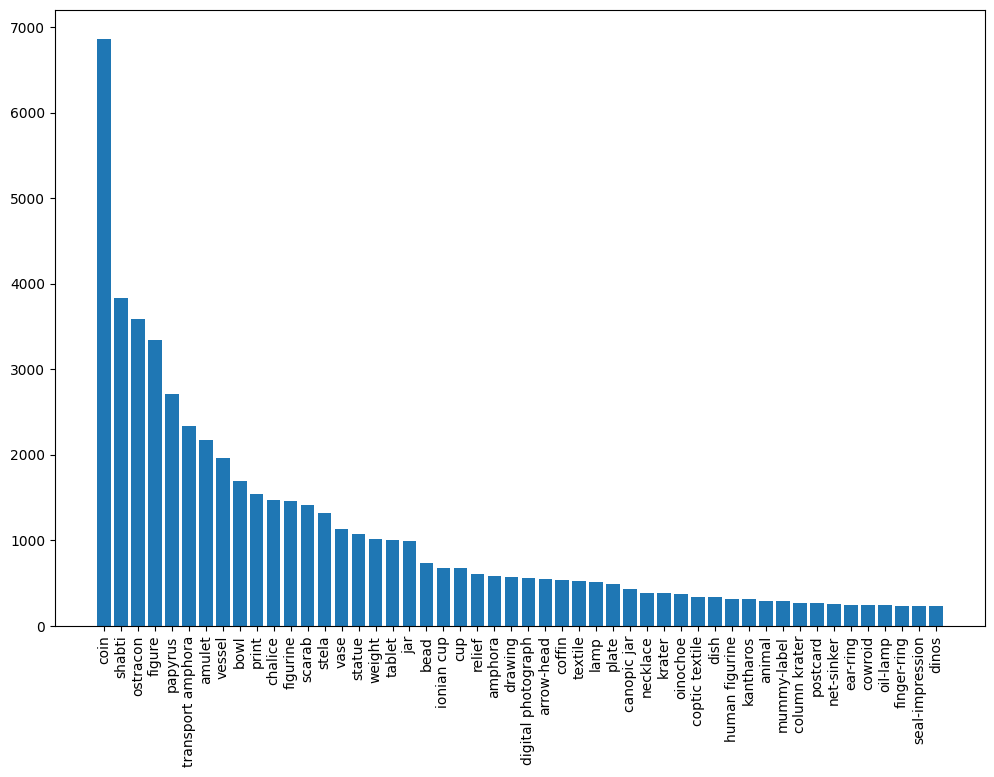

In [51]:
x =df_all['object_classification'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = x.index[0:50] ,  height= x.values[0:50])

In [66]:
only_shabti = df_all[df_all['object_classification'] == 'amphora']
only_shabti
#only_shabti.iloc[-1]

,name,object_classification,date,description,material,dynasty,path,location,period
8843,amphora,amphora,535BC (circa),[Text from BM catalogue of vases] Pottery: bl...,pottery,Attic,bri_G_1849-0518-10.jpg,None,None
9205,amphora,amphora,6thC-7thC,Pottery amphora for wine.,pottery,Roman,bri_G_1883-1124-34.jpg,None,None
9270,amphora,amphora,610BC-580Bc (circa),Shoulder and body sherd (mended from four fra...,pottery,East Greek,bri_G_1886-0401-1050.jpg,None,None
9330,amphora,amphora,600BC-575BC (circa),Body sherd (mended from two fragments) of Att...,pottery,Attic,bri_G_1886-0401-1100.jpg,None,None
9336,amphora,amphora,600BC-575BC (circa),Body sherd of Attic black-figured pottery clo...,pottery,Attic,bri_G_1886-0401-1106.jpg,None,None
...,...,...,...,...,...,...,...,...,...
70978,amphora,amphora,None,"pottery amphora, truncate cone-shaped, with a ...",clay,None,glo_8408.jpg,masmas:-nag`gamus,meroitic period
70990,amphora,amphora,None,amphora with lateral handles. it has a narrow ...,clay,None,glo_8419.jpg,masmas:-nag`gamus,meroitic period
71583,NaN,amphora,None,NaN,pottery,None,glo_8953.jpg,el-hiba,graeco-roman period
71803,NaN,amphora,None,NaN,sandstone,None,glo_9151.jpg,el-sheikh `abada,coptic period


### `3. date`
- combine similar and dates and synon.
- You well combine the dates that are between, for example find the largest interval and combine.

In [129]:
df_all['date'].value_counts()

date
ca. 1390-1352 B.C.     1038
6500BC-6000BC           777
ca. 1479-1458 B.C.      768
ca. 1981-1640 B.C.      552
575BC-550BC (circa)     542
                       ... 
1886 (circa)              1
1838                      1
1745-1760 (c.)            1
1881                      1
1784-1668 BCE             1
Name: count, Length: 7078, dtype: int64

In [130]:
y =df_all['date'].value_counts()
#y.to_csv("date_trial.csv")

In [131]:
import pandas as pd
import re

def clean_date(cell):
    # Check if the cell is a valid string
    if isinstance(cell, str):
        # Remove "ca." and "."
        cleaned_cell = re.sub(r'ca\.|\.', '', cell)
        
        # Remove brackets and what they contain
        cleaned_cell = re.sub(r'\([^)]*\)', '', cleaned_cell)
        
        # Replace "bce" with "bc"
        cleaned_cell = cleaned_cell.replace('BCE', 'BC')
        # Make all lowercase
        cleaned_cell = cleaned_cell.lower()

        # Replace "bce" with "bc"
        cleaned_cell = cleaned_cell.replace('bce', 'bc')

        # Replace "bce" with "bc"
        cleaned_cell = cleaned_cell.replace(' - ', '-')
        
        # Remove leading and trailing spaces
        cleaned_cell = cleaned_cell.strip()
        
        return cleaned_cell
    else:
        return cell  # Return the original value if not a string

# Apply the function to the specified column
df_all['date'] = df_all['date'].apply(clean_date)

In [132]:
y =df_all['date'].value_counts()
y.to_csv("frequency\date_trial.csv")

In [133]:
y

date
1390-1352 bc      1039
6500bc-6000bc      777
1479-1458 bc       768
600 bc-570 bc      659
575bc-550bc        610
                  ... 
1050 bc-300 bc       1
3rd bc               1
491bc                1
500bc-200            1
1784-1668 bc         1
Name: count, Length: 5124, dtype: int64

<BarContainer object of 50 artists>

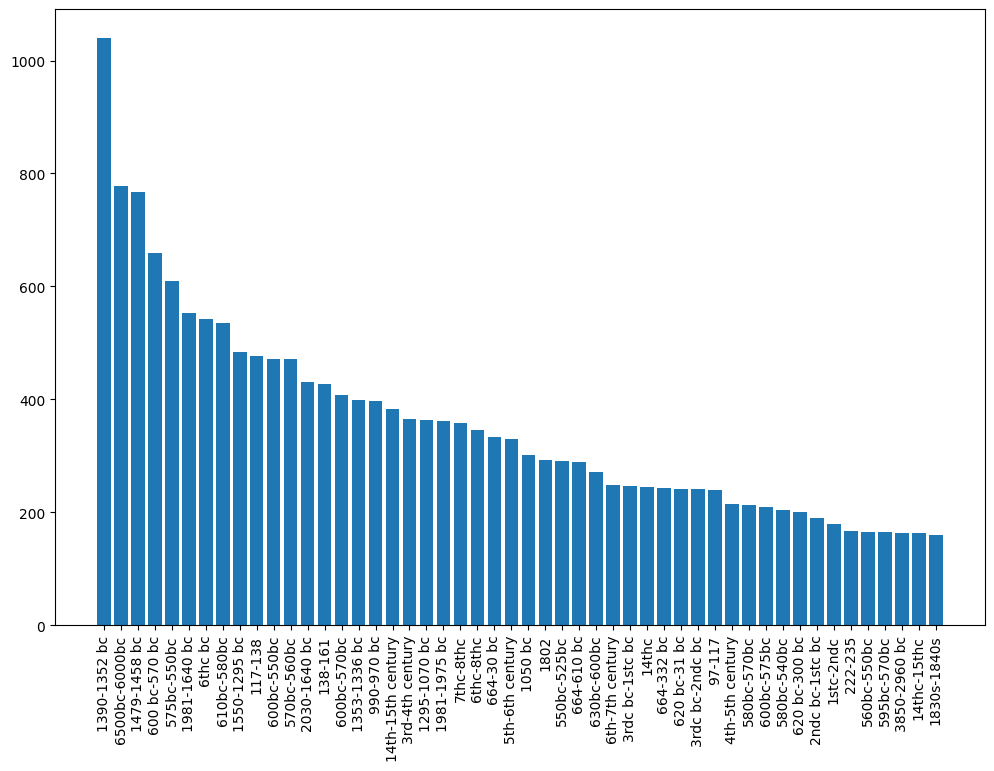

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = y.index[0:50] ,  height= y.values[0:50])

### `4. Description`

In [135]:
# Example usage:
df_all['description'] = clean_column(df_all['description'])

### `5. material`

In [136]:
y =df_all['material'].value_counts()
#y.to_csv("material_trial.csv")

In [137]:
y

material
pottery                                                                                                 20928
copper alloy                                                                                             4743
limestone                                                                                                4559
glazed composition                                                                                       3766
papyrus                                                                                                  2709
                                                                                                        ...  
Coniferous wood , paint                                                                                     1
Gold, linen cord                                                                                            1
Lapis lazuli, carnelian, linen cord                                                                         1
C

In [138]:
def clean_matrial_dynasty(column):
   # Remove content within parentheses
    column = column.str.replace(r'\([^)]*\)', '', regex=True)
    
    # Remove question marks
    column = column.str.replace('?', '')

     # Remove question marks
    column = column.str.replace('"', '')
    
    # Take only the first value if there is a cell with ","
    column = column.str.split(',').str[0]
    # Remove question marks
    column = column.str.replace('"', '')

    # Remove question marks
    column = column.str.replace(' )', '')


    # Remove leading and trailing spaces
    column = column.str.strip()

    # Convert all letters to lowercase
    column = column.str.lower()
    
    return column
# Example: Apply the function to a specific column in your DataFrame
df_all['material'] = clean_matrial_dynasty(df_all['material'])

In [139]:
y = df_all['material'].value_counts()
y.to_csv("frequency\material_trial2.csv")

In [140]:
y

material
pottery                        21999
limestone                       6110
copper alloy                    4887
faience                         4726
glazed composition              3896
                               ...  
cow hide                           1
cream-white glazed steatite        1
red breccia                        1
terracotta painted brown           1
dried bugs                         1
Name: count, Length: 791, dtype: int64

<BarContainer object of 50 artists>

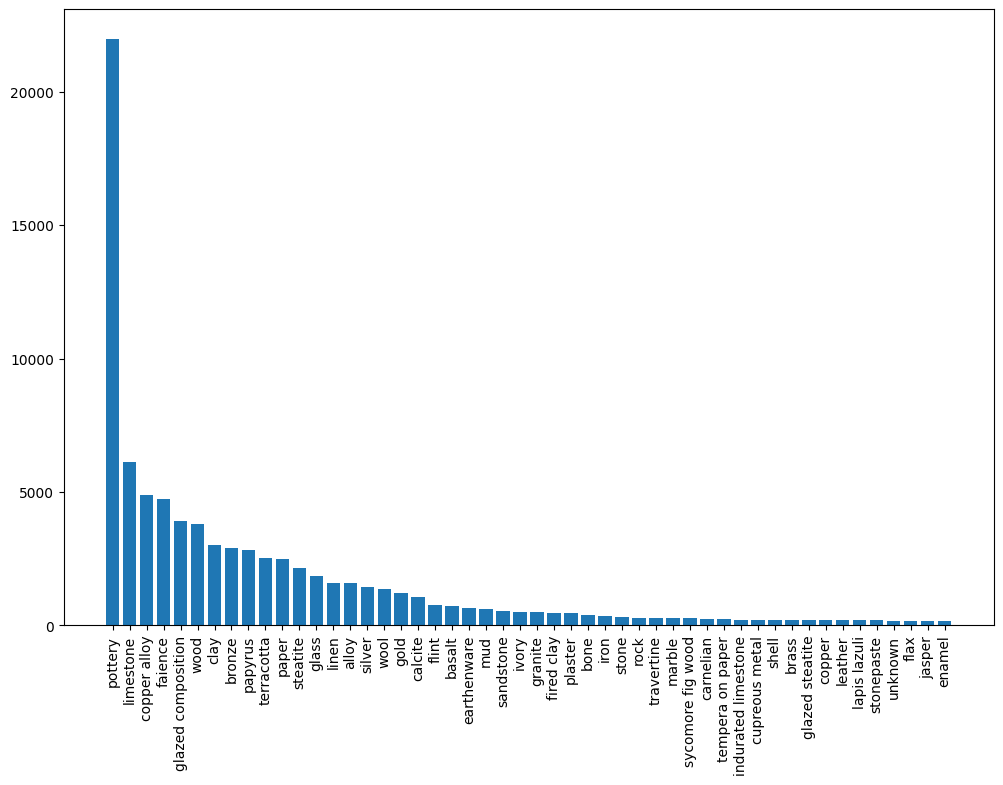

In [141]:
yy =df_all['material'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = yy.index[0:50] ,  height= yy.values[0:50])

### `6. dynasty`

In [142]:

y = df_all["dynasty"].value_counts()
#y.to_csv("dynasty_trial.csv")

In [143]:
y

dynasty
unknown                          5420
 East Greek                      5147
Roman Provincial                 3764
Dynasty 18                       3172
New Kingdom                      2752
                                 ... 
 Late Cypriot I (?)                 1
Ptolemaic ((larger fragment))       1
 Classic Christian Period           1
 Islamic (?)                        1
13TH                                1
Name: count, Length: 1295, dtype: int64

In [144]:
df_all['dynasty'] = clean_matrial_dynasty(df_all['dynasty'])

In [145]:
y = df_all["dynasty"].value_counts()
y.to_csv("frequency\dynasty_trial2.csv")
y

dynasty
unknown                          5420
east greek                       5308
late period                      4524
roman provincial                 3765
dynasty 18                       3713
                                 ... 
probably dynasty 26                 1
dynasty 25-29                       1
dynasty 19-25                       1
dynasty 30-2nd persian period       1
13th                                1
Name: count, Length: 479, dtype: int64

<BarContainer object of 50 artists>

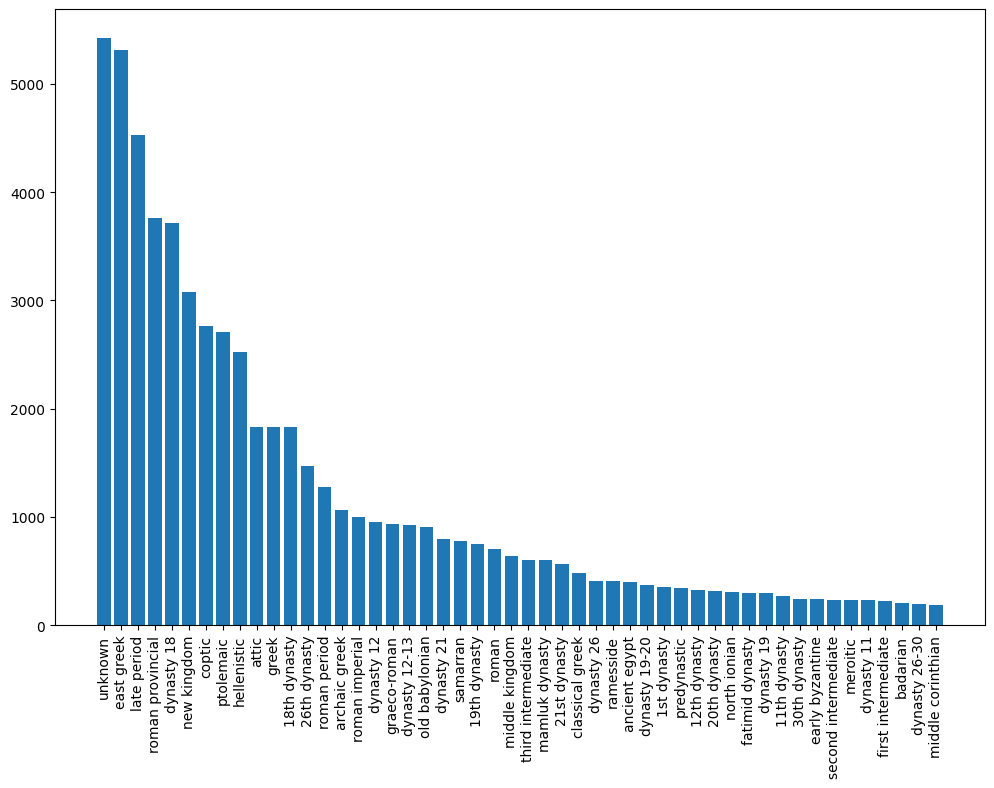

In [146]:
yyy =df_all['dynasty'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = yyy.index[0:50] ,  height= yyy.values[0:50])

### `7. location`

In [147]:
df_all["location"]

0        None
1        None
2        None
3        None
4        None
         ... 
88731    None
88732    None
88733    None
88734    None
88735    None
Name: location, Length: 88736, dtype: object

In [148]:

def clean_location(cell):
    if cell is None:
        return None  # Return None for NaN or None values

    if isinstance(cell, list):
        cell = str(cell)

    # Remove occurrences of "near", "probably", "possibly"
    cell = re.sub(r'\b(?:near|probably|possibly)\b', '', cell, flags=re.IGNORECASE)

    # Remove brackets and their contents
    cell = re.sub(r'\[.*?\]', '', cell)
    cell = re.sub(r'\{.*?\}', '', cell)
    cell = re.sub(r'\(.*?\)', '', cell)

    # Remove double quotes
    cell = cell.replace('"', '')

    # Remove extra spaces at the beginning and end
    cell = cell.strip()

    return cell
  
# Apply the function to the specified column
df_all['location'] = df_all['location'].apply(clean_location)



In [149]:
dd = df_all["location"].value_counts()
dd.to_csv("frequency\location_trial2.csv")

In [150]:
dd

location
                           15168
unknown                     8052
abydos                       528
mirgissa                     516
deir el-bahari               372
                           ...  
sakha                          1
kom el-hisn                    1
governorate of qena            1
temple of amenhotep iii        1
tafa                           1
Name: count, Length: 213, dtype: int64

<BarContainer object of 50 artists>

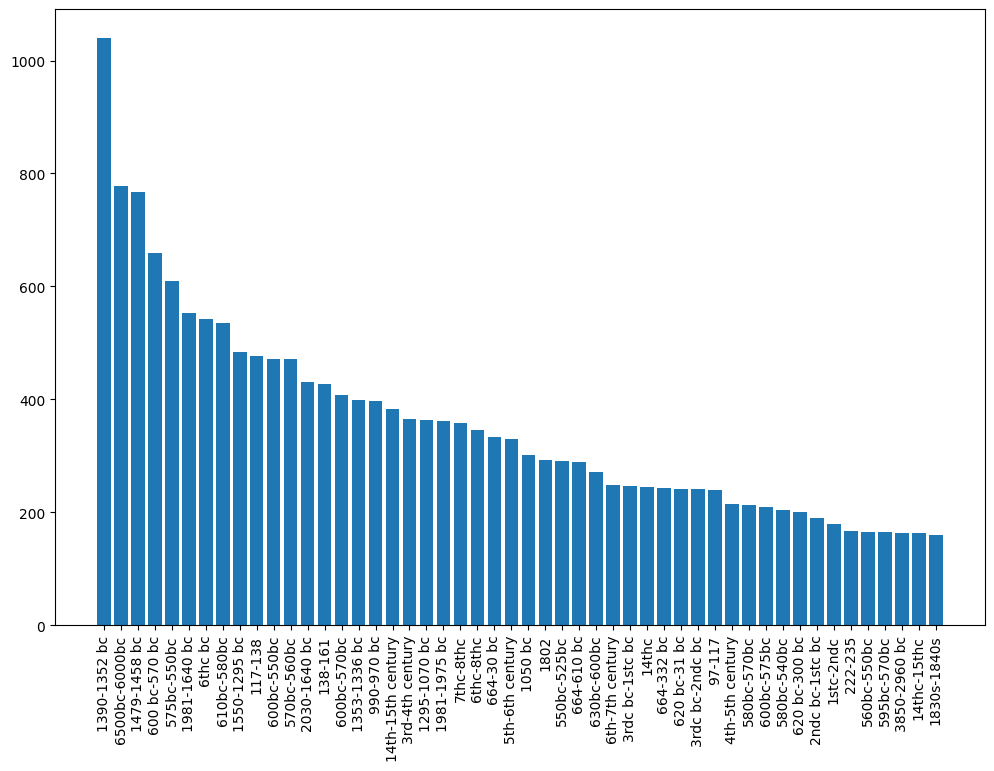

In [151]:
xx =df_all['date'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = xx.index[0:50] ,  height= xx.values[0:50])

### `8. period`

In [152]:
df_all["period"].value_counts()

period
[]                                                         3380
late period                                                2052
[Middle Kingdom]                                           1605
new kingdom                                                1475
unknown                                                    1438
                                                           ... 
[reign of Akhenaten to Aya, New Kingdom, Amarna Period]       1
[reign of Ptolemy II Philadelphos, Ptolemaic Period]          1
[reign of Psamtik I, Late Antique]                            1
[reign of Trajan, Roman Period, Trajan]                       1
Coptic Byzantine                                              1
Name: count, Length: 792, dtype: int64

In [153]:
# Apply the function to the specified column
def process_period(cell):
    if isinstance(cell, list):
        cell = ' '.join(map(str, cell))  # Convert list to string
    if isinstance(cell, str):
        # Remove brackets, double quotes, and make everything lowercase
        cell = cell.replace('[', '')
        cell = cell.replace(']', '')
        cell = cell.replace('"', '')
        cell = cell.lower()
        cell = cell.strip()
    return cell

# Apply the function to the specified column
df_all['period'] = df_all['period'].apply(process_period)

In [154]:
dd = df_all["period"].value_counts()
dd.to_csv("frequency\period_trial2.csv")

<BarContainer object of 50 artists>

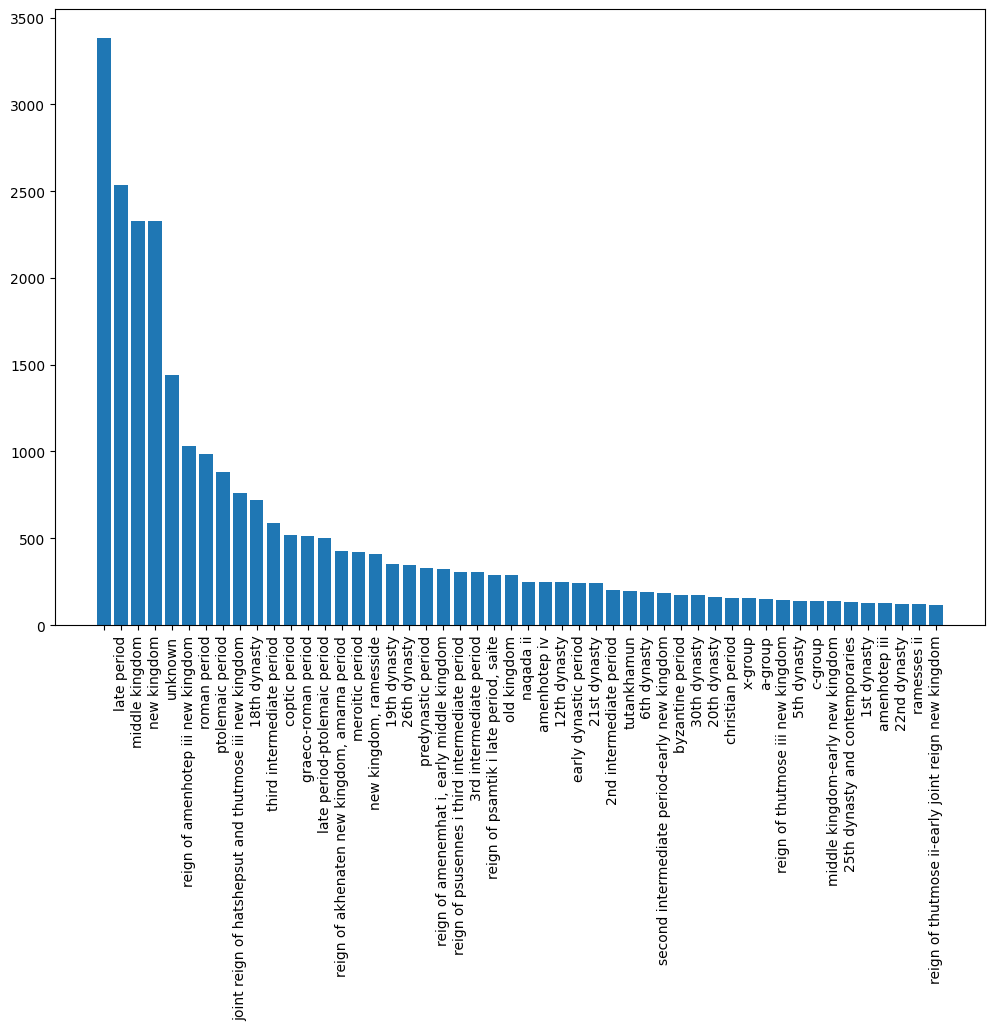

In [155]:
yx =df_all['period'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.bar(x = yx.index[0:50] ,  height= yx.values[0:50])

#### What is left 
1. normalize all the unkown => unknown, nan, '' , ? , uncertain etc. to all be the same
2. combine the similar words into one further to decrease the classes

In [156]:
df_all.to_csv("trial_cleaning2.csv")

In [157]:
len(df_all)

88736